<a href="https://colab.research.google.com/github/SidhiPanda/ML/blob/main/MDL_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Tutorial : Machine Learning Libraries and Classification


In [1]:
#libaries to import 
import matplotlib.pyplot as plt
import math
import sklearn 
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import random
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import time 
from sklearn.naive_bayes import GaussianNB




In [2]:
#Will store some constants that may come useful later
SEED = 42

#For the NN training later 
# Define hyperparameters
BATCH_SIZE = 64
LEARNING_RATE = 0.01
NUM_EPOCHS = 10

Dataset Used : IRIS Dataset \\
IRIS dataset is an small dataset of about 150 examples of 3 different species of the IRIS flower. The three different types of flowers are Iris setosa, Iris virginica and Iris versicolor. The dataset contains 4 physical attributes for each sample of the flower. The four features are sepal length, sepal width, petal length and petal width. 

In [3]:
""" We implement a dataset class here """
class IRIS:
  """ IRIS dataset class """
  def __init__(self, train_split , test_split):

    """ 
        Loads the iris dataset from scikit-learn and initializes various data attributes for use in classification tasks.

      ARGUMENTS :
        train_split , test_split, val_split = ratio of spliting dataset 
        Sure! Here's an example of a Python docstring for the given code:


      Loads the iris dataset from scikit-learn and initializes various data attributes for use in classification tasks.

      Attributes:
          iris_data (sklearn.utils.Bunch): A dictionary-like object holding the data and metadata for the iris dataset.
          iris_dataframe (pandas.DataFrame): A pandas DataFrame representation of the iris dataset.
          train_split (float): The proportion of the data to use for training. Should be a value between 0 and 1.
          test_split (float): The proportion of the data to use for testing. Should be a value between 0 and 1.
          train_X (numpy.ndarray or None): The features for the training data. Initialized to None.
          test_X (numpy.ndarray or None): The features for the testing data. Initialized to None.
          train_Y (numpy.ndarray or None): The labels for the training data. Initialized to None.
          test_Y (numpy.ndarray or None): The labels for the testing data. Initialized to None.

      Returns:
          None
    """ 
 
    self.iris_data = datasets.load_iris() # sklearn automatically downloads the data
    self.iris_dataframe = self.format_data_to_dataframe()
    self.train_split = train_split
    self.test_split = test_split
    self.train_X = None
    self.test_X = None
    self.test_Y = None
    self.train_Y = None 

    self.split_dataset()
  
  def split_dataset(self):
    #divide the data into X and Y
    X = self.iris_data.data
    Y = self.iris_data.target
    self.train_X, self.test_X, self.train_Y, self.test_Y = train_test_split(X,Y, train_size = self.train_split, test_size = self.test_split, random_state = SEED, shuffle = True)




  def format_data_to_dataframe(self):
    """ converts data loaded using load_iris to the pandas dataframe 
    iris_data returns the following relevant data 
    data = (150,4) size numpy array with the features
    feature_names : A list of the names of the each attribute in the data
    target : A array containing the class id of the sample
    target_name : A array which maps the class id to species name 
    
    RETURNS :
      a pandas dataframe with the relevant data
    """
    #extracting the relevant information
    feature_data = self.iris_data.data
    feature_names = self.iris_data.feature_names
    target = self.iris_data.target 
    target_names = self.iris_data.target_names
    # We first build a dictionary to format the data and then pass it to pandas
    data = {}
    for index,name in enumerate(feature_names):
      data[name] = feature_data[:,index]
    data["class ids"] = target
    data["class names"] = [target_names[target_id] for target_id in target]
    iris_dataframe = pd.DataFrame(data = data)
    return iris_dataframe 

  def get_class_names(self, class_ids):
    """ given a list of class id, or just a class id return the corresponding class name datastructure 
      ARGS:
        class_ids: list, int or np.array(1D)
      RETUNRS:
        class_names : list, int or np.array(1D)
    """
    if type(class_ids) == int:
      return self.iris_data.target_names[class_ids]
    if type(class_ids) == list:
      return [self.iris_data.target_names[class_id] for class_id in class_names]
    else :
      # assumption is this is np array 
      return [self.iris_data.target_names[class_ids[i]] for i in range(class_ids.shape[0])]
  def get_random_examples(self, n = 1):
    """ returns a random sample of the data 
    ARGS :
      n : number of samples you want 
    RETURN :
      the random set of samples 
    """
    sampled_data = self.iris_dataframe.sample(n)
    return sampled_data 
  def getitem(self, index):
    """ returns a particular index(datapoint) from the dataset 
    ARGS :
      index : the index of the datapoint 
    RETURNS :
      the particular dataopoint 
    """
    datapoint = self.iris_dataframe.iloc[index]
    return datapoint 
  def get_size(self):
    """ returns the size of the dataset """
    return self.iris_data.data.shape[0]
  
  def display_whole_dataset(self):
    """ displays the whole dataset """
    print(self.iris_dataframe.head(self.get_size()))





Load and Visualize the Dataset 


In [4]:
dataset = IRIS(130,20)
print("Size of the Dataset : {0} ".format(dataset.get_size()))
print("10 Random Samples from the dataset :")
print(dataset.get_random_examples(10))
#print(" The 4th datapoint of the dataset : {0}".format(dataset.getitem(3)))
#print("The whole dataset ")
#dataset.display_whole_dataset()


Size of the Dataset : 150 
10 Random Samples from the dataset :
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
23                 5.1               3.3                1.7               0.5   
106                4.9               2.5                4.5               1.7   
113                5.7               2.5                5.0               2.0   
58                 6.6               2.9                4.6               1.3   
22                 4.6               3.6                1.0               0.2   
107                7.3               2.9                6.3               1.8   
118                7.7               2.6                6.9               2.3   
28                 5.2               3.4                1.4               0.2   
115                6.4               3.2                5.3               2.3   
3                  4.6               3.1                1.5               0.2   

     class ids class names  
23           0 

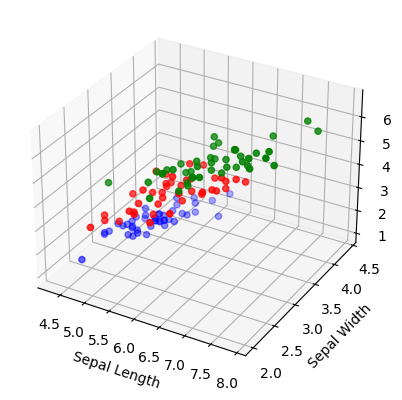

In [5]:
## We do some basic Visualization 


def visualize_data(features, labels):
  """ visualize the data in a 3D dimensional space , this done by taking the first 3 features to plot 
    ARGS : 
      features : features matrix 
      labels : target id 
  """
  features_3D = features[:,0:3]
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('Sepal Length')
  ax.set_ylabel('Sepal Width')
  ax.set_zlabel('Petal Length')
  COLORS = ["b", "r", "g"]
  colors = [COLORS[i] for i in labels]

  ax.scatter(features_3D[:,0], features_3D[:,1], features_3D[:,2], c=colors)
  plt.show()

visualize_data(np.copy(dataset.train_X), np.copy(dataset.train_Y))

  



Now Coming to the classification Algorithms 

## K nearest neighbours algorithm 

In K nearest algorithms you have the train and test data. Their is no training procedure as such. To classify the test sample, the sample is compared to all training samples, with some given metric(most of the time euclidean distance) and the k samples with the lowest distance are taken. The final label is assigned by weighing the labels of the k training samples in some form of voted. It fast to train(that is it takes no time at all 


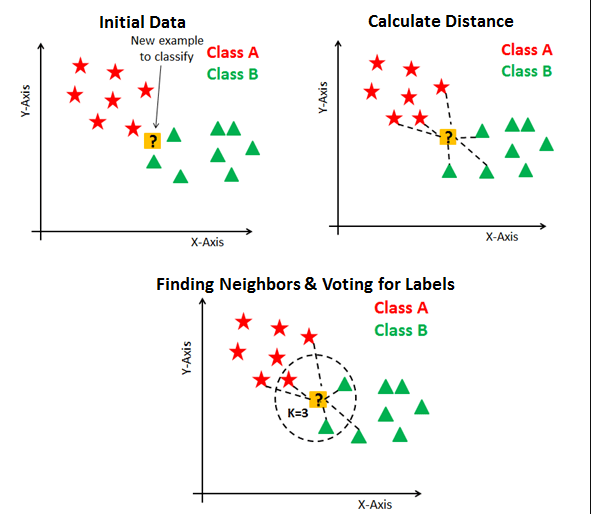


In [6]:
## Now build and predict using the KNN model
def KNN_predict(train_X, train_Y, test_X, test_Y, K, norm = 2):
    """
    Builds a KNN model using scikit-learn's KNeighborsClassifier and outputs a list of predictions and accuracy score.

    Parameters:
    -----------
    train_X: array-like, shape (n_samples, n_features)
        Training data.

    train_Y: array-like, shape (n_samples,)
        Target values for training data.

    test_X: array-like, shape (n_samples, n_features)
        Test data.

    test_Y: array-like, shape (n_samples,)
        Target values for test data.

    K: int
        Number of nearest neighbors to consider.
    norm : int 
        The KNN by default uses minkowski distance as default, and norm sets which p to use for the norm , 
        for example norm = 1 is manhattan , 2 is euclidean  

    Returns:
    --------
    result: tuple of (list, float)
        A tuple containing a list of predicted values and the accuracy score.

    """
    # Create a KNN classifier object with the given value of K
    #note you can define your function def distance(a,b) which computes distance between 
    # any two samples in the dataset and pass the function to KNN
    # using this format KNeighborsClassifier(n_neighbors=K, metric = distance)
    knn = KNeighborsClassifier(n_neighbors=K, p = norm)

    # Train the KNN classifier using the training data
    knn.fit(train_X, train_Y)

    # Use the trained classifier to make predictions on the test data
    predictions = knn.predict(test_X)

    # Calculate the accuracy score of the predictions
    accuracy = accuracy_score(test_Y, predictions)

    # Return a tuple containing the predictions and the accuracy score
    return predictions, accuracy 
    
def plot_KNN_result(train_X, train_Y, test_X, test_Y, max_K = 10):
    """
      Plots the accuracy of K-Nearest Neighbor (KNN) classification algorithm for different values of K.

      Parameters:
      train_X (numpy array): The training data features.
      train_Y (numpy array): The training data labels.
      test_X (numpy array): The test data features.
      test_Y (numpy array): The test data labels.
      max_K (int): The maximum number of neighbors to consider (default 10).

      Returns:
      None. Displays a scatter plot of accuracy score against the number of neighbors (K).

      """  
    
    Ks = [i for i in range(1,max_K + 1)]
    accuracies = []
    for k in Ks:
      predictions, accuracy = KNN_predict(train_X, train_Y, test_X, test_Y, k)
      accuracies.append(accuracy)
    print(len(Ks))
    print(len(accuracies))
    for i in range(0,max_K):
      print("K : {0} Accuracy : {1} ".format(i+1, accuracies[i]))
    plt.scatter(Ks, accuracies)
    #set the ylim by scaling
    plt.ylim(0,1.05)
    plt.xlabel("number of neighbours(K)")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy vs K")
    plt.show()



In [7]:
prediction , accuracy = KNN_predict(np.copy(dataset.train_X), np.copy(dataset.train_Y), np.copy(dataset.test_X), np.copy(dataset.test_Y), K = 3)
predicted_names = dataset.get_class_names(prediction)
true_names = dataset.get_class_names(np.copy(dataset.test_Y))
print("The accuracy is : {0}".format(accuracy))
for i in range(len(dataset.test_Y)):
  ground_truth = true_names[i]
  predicted_class = predicted_names[i]
  print(" The prediction is : {0} and the ground truth is {1}".format(predicted_class, ground_truth))


The accuracy is : 1.0
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : setosa and the ground truth is setosa
 The prediction is : virginica and the ground truth is virginica
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : setosa and the ground truth is setosa
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : virginica and the ground truth is virginica
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : virginica and the ground truth is virginica
 The prediction is : setosa and the ground truth is setosa
 The prediction is : setosa and the ground truth is setosa
 The prediction is : setosa and the ground truth is setosa
 The prediction is : setosa and the ground truth is setosa
 The prediction is : versic

How do we select what is the best K to use for any given dataset ? Unfortunately there isn't any theoretical grounding for how to choose this K. So the best way( or the way most people do) is to choose the K which is smallest in size while giving the best accuracy. This is done by plotting using the scores using the validation set. But for the sake of simplicity I will do it using train set.


10
10
K : 1 Accuracy : 1.0 
K : 2 Accuracy : 1.0 
K : 3 Accuracy : 1.0 
K : 4 Accuracy : 1.0 
K : 5 Accuracy : 1.0 
K : 6 Accuracy : 1.0 
K : 7 Accuracy : 0.95 
K : 8 Accuracy : 1.0 
K : 9 Accuracy : 1.0 
K : 10 Accuracy : 1.0 


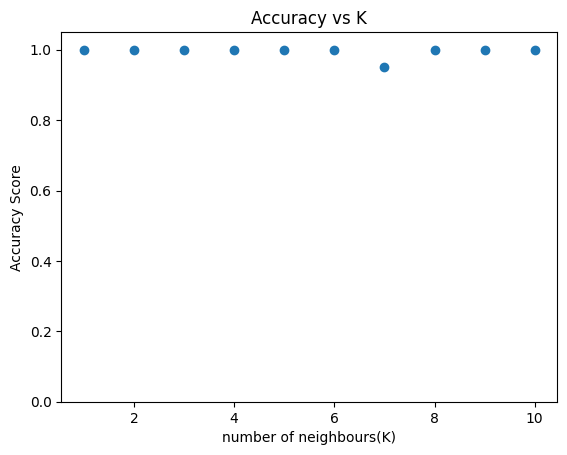

In [8]:
plot_KNN_result(np.copy(dataset.train_X), np.copy(dataset.train_Y), np.copy(dataset.test_X), np.copy(dataset.test_Y), 10)

Now coming to the next algorithm which is tree based algorith called ID3. ID3(Iterative Dichotomiser 3) constructs a tree by computing which feature provides the best information gain and partition the dataset based on the feature. Unfortunately ID3 is not implemented in sci-kit learn but an optimized CART algorithm which is based on ID3 with support for non-categorical features and some optimization is used instead for their decision tree model.

For further reading please refer to this
[Sklearn Decision Tree](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart)

In [9]:
import time
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier

class DecisionTree:
  """
  A class that builds a decision tree using the scikit-learn library.

  Args:
    criterion (str): The function to measure the quality of a split. Can be "gini" for the Gini impurity or "entropy" for the information gain. Default is "gini".
  
  Attributes:
    criterion (str): The criterion used to build the decision tree.
    Tree (DecisionTreeClassifier): The decision tree classifier object from scikit-learn.


  """
  
  def __init__(self, criterion="gini"):
    """
    Initializes a new instance of the DecisionTree class.

    Args:
      criterion (str): The function to measure the quality of a split. Can be "gini" for the Gini impurity or "entropy" for the information gain. Default is "gini".
    """
    self.criterion = criterion
    self.Tree = DecisionTreeClassifier(criterion=self.criterion, random_state=SEED)
  
  def train(self, train_X, train_Y):
    """
    Trains the decision tree on the given training data.

    Args:
      train_X (array-like): The feature matrix of the training data.
      train_Y (array-like): The class labels of the training data.
    """
    print("start training")
    t1 = time.time()
    self.Tree.fit(train_X, train_Y)
    t2 = time.time()
    print("Time taken for training: {0}".format(t2 - t1))
  
  def predict(self, examples):
    """
    Predicts the class labels of the given examples using the trained decision tree.

    Args:
      examples (array-like): The feature matrix of the examples to predict.

    Returns:
      array-like: The predicted class labels of the examples.
    """
    predictions = self.Tree.predict(examples)
    return predictions

  def show_tree(self):
    """
    Plots the decision tree graphically.
    """
    sklearn.tree.plot_tree(self.Tree)


In [10]:
tree = DecisionTree()
tree.train(np.copy(dataset.train_X), np.copy(dataset.train_Y))
print("------------TRAINING ACCURACY------------")

predictions = tree.predict(np.copy(dataset.train_X))
accuracy = accuracy_score(predictions, dataset.train_Y)
print("Training Accuracy is : {0}".format(accuracy))
print("")
print("")
print("-------------TEST ACCURACY----------------")

predictions = tree.predict(np.copy(dataset.test_X))
accuracy = accuracy_score(predictions, dataset.test_Y)
print("Test Accuracy is : {0}".format(accuracy))
predicted_names = dataset.get_class_names(predictions)
print("")
print("")
print("-------------TEST RESULTS -------------------")
for i in range(len(dataset.test_Y)):
  ground_truth = true_names[i]
  predicted_class = predicted_names[i]
  print(" The prediction is : {0} and the ground truth is {1}".format(predicted_class, ground_truth))


start training
Time taken for training: 0.0023169517517089844
------------TRAINING ACCURACY------------
Training Accuracy is : 1.0


-------------TEST ACCURACY----------------
Test Accuracy is : 1.0


-------------TEST RESULTS -------------------
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : setosa and the ground truth is setosa
 The prediction is : virginica and the ground truth is virginica
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : setosa and the ground truth is setosa
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : virginica and the ground truth is virginica
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : virginica and the ground truth is virginica
 The prediction is : setosa and the gr

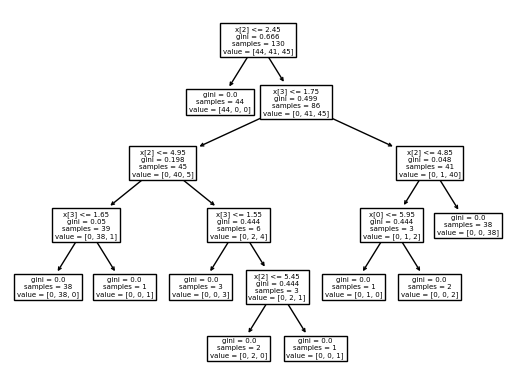

In [11]:
tree.show_tree()

Now we come to naive bayes classifier. This is a class of classifier with the following basic principle.
Given a vector $ X = (x_1,x_2....x_n) $ and the target class $y$. Our objective is to compute 
$$ P(y | x_1,x_2 ....x_n) $$
From Bayes Rule 
$$ P(y | x_1,x_2....x_n) = \frac{P(y) P(x_1,x_2...x_n|y) }{P(x_1,x_2...x_n)} $$
The we use the **naive** assumption ssumption of conditional independence between every pair of features given the value of the class variable
$$ P(x_i | y, x_1,x_2 ..x_{i-1}, x_{i+1} ...x_n) = P(x_i|y) $$
Using this we can simplify the above expression 
$$ P(y | x_1,x_2....x_n) = \frac{P(y) \prod_{i=1}^n P(x_i | y)
  }{P(x_1,x_2...x_n)} $$

We want the class with highest probability. For that we can ignore the denominator and compute the following 

$$ \hat{y} = \arg \max_y P(y) \prod_{i=1}^n P(x_i | y)$$

How different flavours of Naive Bayes differ is the assumption regarding the probability distribution of  $ P(x_i| y) $. We can make different distributional assumption for different classifier. We focus on the Gaussian Naive Bayes.

Here we have 
 $$ P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma_2}}e^{\frac{-(x_i - \mu_y)^ 2}{2\sigma_y^2 }}$$
Where $\sigma_y$ and $\mu_y$ are calculated using maximum likelyhood estimate 
For further reading please refer to this [Naive Bayes](https://https://scikit-learn.org/stable/modules/naive_bayes.html)

In [12]:
class GaussianNaiveBayes:
  """ builds a Gaussian Naive Bayes classifier """
  def __init__(self):
    
    self.classifier = GaussianNB()
  
  
  def train(self, train_X, train_Y):
    """
    Trains the Gaussian Naive bayes on the given training data.

    Args:
      train_X (array-like): The feature matrix of the training data.
      train_Y (array-like): The class labels of the training data.
    """
    print("start training")
    t1 = time.time()
    self.classifier.fit(train_X, train_Y)
    t2 = time.time()
    print("Time taken for training: {0}".format(t2 - t1))
  
  def predict(self, examples):
    """
    Predicts the class labels of the given examples using the trained decision tree.

    Args:
      examples (array-like): The feature matrix of the examples to predict.

    Returns:
      array-like: The predicted class labels of the examples.
    """
    predictions = self.classifier.predict(examples)
    return predictions

In [13]:
Bayes = GaussianNaiveBayes()
Bayes.train(np.copy(dataset.train_X), np.copy(dataset.train_Y))
print("------------TRAINING ACCURACY------------")

predictions = Bayes.predict(np.copy(dataset.train_X))
accuracy = accuracy_score(predictions, dataset.train_Y)
print("Training Accuracy is : {0}".format(accuracy))
print("")
print("")
print("-------------TEST ACCURACY----------------")

predictions = Bayes.predict(np.copy(dataset.test_X))
accuracy = accuracy_score(predictions, dataset.test_Y)
print("Test Accuracy is : {0}".format(accuracy))
predicted_names = dataset.get_class_names(predictions)
print("")
print("")
print("-------------TEST RESULTS -------------------")
for i in range(len(dataset.test_Y)):
  ground_truth = true_names[i]
  predicted_class = predicted_names[i]
  print(" The prediction is : {0} and the ground truth is {1}".format(predicted_class, ground_truth))


start training
Time taken for training: 0.002573728561401367
------------TRAINING ACCURACY------------
Training Accuracy is : 0.9538461538461539


-------------TEST ACCURACY----------------
Test Accuracy is : 1.0


-------------TEST RESULTS -------------------
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : setosa and the ground truth is setosa
 The prediction is : virginica and the ground truth is virginica
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : setosa and the ground truth is setosa
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : virginica and the ground truth is virginica
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : versicolor and the ground truth is versicolor
 The prediction is : virginica and the ground truth is virginica
 The prediction is : set

## EXTRA STUFF : PYTORCH, GPU TRAINING and DEEP LEARNING
Please note that this is not required for your course and we will be covering this only in the case that we have extra time. 

While so far we have covered classical machine learning method, we now disuss deep learning based method. We use pytorch to build and train these model on the MNIST dataset. The MNIST dataset contains image of handwritten digit and our job is to identify which digit it is. 

For this we use a very simple Feed forward layer with 2 hidden layer and ReLU as the activation function. 
Activation functions are used to add non-linearity to the model which allows them to learn complex functions.'
We use ReLU as our activatio function. ReLU is given by 
$$ f(x) = \max(0,x) $$

We also define a loss to evaluate and train our model.
We choose the cross entropy loss for this, This is most commonly used loss. The cross entropy loss is given by 
 $$ \text{Cross Entropy Loss} = -\sum_{i}^{C}t_i \log{\frac{e^{x_i}}{\sum_{j}^{C}e^{x_j}}}$$
 Where $C$ is the number of classes , $ X = (x_1,x_2,..x_c) $ are the output of the model and $ T = (t_1,t_2.....t_c) $ is the target label defines as $t_i = 1 $ if $i^{th}$ class is the true and $t_i = 0$ if not.

We also need an optimization algorithm to use the loss to compute the gradient and update the model. We use the stochastic gradient descent.

In batch gradient descent, we compute the loss over all samples in the dataset and use that loss to generate the gradients that we used to update the model

In mini batch gradient descent, we compute the loss for the small batch(subset of the whole dataset) and this loss is supposed to serve as the approximate of the whole dataset and use this approximate loss to compute the gradient for the model update. This is largely done for computational purpose and this prevents storing and computation of large number of gradients.

In stochastic gradient descent , the batch size is set to 1 , that is update is done for each sample.
In practice pytorch's SGD is actually minibatch gradient descent. 

The importance and beauty of pytorch is that it allows you to do both massive levels of parallelization through GPU, batching and Multi-GPU training/inference along with complex gradient computation with very little effort. 


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms


In [15]:

#In pytorch inputs are tensors, which are multidimensional array 
# Understanding tensors are very important to working with pytorch, because the computational graph which is used for training and inference are build 
# using these tensors and these tensor also stores the gradient to do backpropagation 
# for neural networks to train stability , it is better to centre the data to 0 and scale by standard deviation otherwise some features tend 
# to dominate over others. 
# Define transformation for input data
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # normalize input
])

## modified from https://pytorch.org/vision/stable/auto_examples/plot_visualization_utils.html
def show(imgs):
    """ makes a grid to display the list of images 
    ARGS :
      imgs : a tensor instance from a dataset class or a list of tensor instance from a image dataset class 
    """
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        # dataset returns data as tensor and shape (c,h,w)
        # we want the image to be numpy and shaped as (h,w) as c here is 1 
        img = np.copy(img.numpy())
        img = img.squeeze(0)
        
        axs[0, i].imshow(np.asarray(img), cmap = 'gray')
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [16]:
# pytorch uses a define dataset class to handle the data 
# this dataset class is customizable to fit any kind of data you want
# Load training and testing datasets

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)



# Create data loaders
# dataloader helps parallize your training. 
# it returns batches of your dataset. If for instance your batchsize = 32 and your image has dimension (28,28)
# the dataloader for each iterate returns a tensor of shape (32,1,28,28) where 1 is the channel
# pytorch sets the input format to (batch_size, channel, height , width)
# parallization is critical to ensure one is able to train on large sets of data
# As GPU memory is limited, finding the right batchsize for your dataset and GPU is critical for efficient training 
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Number of Training Examples : 60000 
Number of Test Examples : 10000 
shape of instance of the dataclass : torch.Size([1, 28, 28])
shape of the images outputted by the dataloader : torch.Size([64, 1, 28, 28]) and shape of the labels outputted by the dataloader : torch.Size([64])


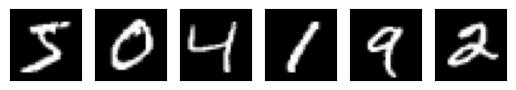

In [17]:
#visualize the dataset 
# the dataset returns (img, class) hence we take 0th index if we only want the image 
training_images = [train_dataset[i][0] for i in range(6)]
show(training_images)
print("Number of Training Examples : {0} ".format(len(train_dataset)))
print("Number of Test Examples : {0} ".format(len(test_dataset)))
print("shape of instance of the dataclass : {0}".format(training_images[0].shape))
images, labels = next(iter(test_loader))
print("shape of the images outputted by the dataloader : {0} and shape of the labels outputted by the dataloader : {1}".format(images.shape, labels.shape))


In [18]:
# define the model , and training and test loop
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.Classifier = nn.ModuleList([
            nn.Linear(784, 256),
            nn.ReLU(), # Relu is activation function for the purposes of adding nonlinearity 
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        ])

    def forward(self, x):
        #assume the input is (32,1,28,28)
        #print("input data shape : {0}".format(x.shape))
        x = x.view(-1, 784)  # flatten input tensor This flatten the input size in the last 3 dimension. Note 28*28 is 784
        # the first linear layer transforms (64,784) to(64,256) the next two layers transforms it into (64,128) and the finally to (64,10)
        #print("input data shape after flattening : {0}".format(x.shape))



        for index, layer in enumerate(self.Classifier):
          x = layer(x)    
          #print("layer index : {0} and output shape : {1} ".format(index, x.shape))   
        return x                          
def train(model, train_loader, criterion, optimizer, num_epochs, device):
    """
    Trains a neural network model using a given data loader and loss function.

    Args:
        model: A PyTorch neural network model.
        train_loader: A PyTorch data loader containing training data.
        criterion: A PyTorch loss function.
        optimizer: A PyTorch optimizer.
        num_epochs: The number of epochs to train the model for.
        device : device to be used
    Returns :
      The statistic regarding training
    """
    #add the model to the device
    model = model.to(device)
    train_stats = {}
    t0 = time.time()
    epochs = []
    accuracy = []
    losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        t1 = time.time()
        correct = 0
        total = 0
        for i, data in enumerate(train_loader, 0):

            inputs, labels = data # extracts the input images and labels
            inputs , labels = inputs.to(device), labels.to(device) # add the data to the GPU
            optimizer.zero_grad() # ensures the gradients are initialized to zero, unless the update and gradient calculation will be wrong
            outputs = model(inputs) # makes the model do forward pass on the inputs
            loss = criterion(outputs, labels) # computes the loss
            loss.backward() # this computes the gradients for each parameters using the loss. Basically del(Loss)/ del(w)
            optimizer.step() #use the gradients to update the model parameters
            running_loss += loss.item() #computes the loss 
            _, predicted = torch.max(outputs.data, 1) # does argmax to predict the class id 
            total += labels.size(0) # total number of labels for this batch
            correct += (predicted == labels).sum().item() # number of correct 
        t2 = time.time()
        epochs.append(epoch + 1)
        losses.append(running_loss / len(train_loader))
        accuracy.append(correct / total)


        print('[Epoch %d] loss: %.3f accuracy : %.3f time take : %.3f' % (epoch + 1, running_loss / len(train_loader), correct / total, t2 - t1))
    train_stats = {"epochs" : epochs, "loss" : losses, "accuracy" : accuracy}
    return train_stats
def test(model, test_loader, device):
    """
    Tests a neural network model using a given data loader.

    Args:
        model: A PyTorch neural network model.
        test_loader: A PyTorch data loader containing testing data.
        device : device to be used

    """
    correct = 0
    total = 0
    model = model.to(device)
    with torch.no_grad(): # tells the model not to compute gradients as we don't need it for evals 
        for data in test_loader:
            inputs, labels = data
            inputs , labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy: %d %%' % (100 * correct / total))


In [19]:
test_model = Net()
random_example = torch.rand(32,1,28,28)
res = test_model(random_example)
print(res.shape)

torch.Size([32, 10])


In [20]:
#initiate the model
model = Net()

#criterion is the loss function 
# CrossEntropy Loss computes the cross entropy Loss 
criterion = nn.CrossEntropyLoss()

#optimizater is the stochastic gradient descent.
# It is responsible for computing the gradient and updating the model paramters
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)
#device is used for GPU 
# to use the GPU you have to insert the model and the input inside the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # this tells we want to use the GPU if its available

train_stats = train(model, train_loader, criterion, optimizer, NUM_EPOCHS, device)


[Epoch 1] loss: 0.785 accuracy : 0.804 time take : 27.186
[Epoch 2] loss: 0.301 accuracy : 0.914 time take : 14.251
[Epoch 3] loss: 0.246 accuracy : 0.929 time take : 14.376
[Epoch 4] loss: 0.210 accuracy : 0.939 time take : 14.717
[Epoch 5] loss: 0.182 accuracy : 0.947 time take : 16.662
[Epoch 6] loss: 0.161 accuracy : 0.953 time take : 14.676
[Epoch 7] loss: 0.142 accuracy : 0.959 time take : 14.692
[Epoch 8] loss: 0.128 accuracy : 0.964 time take : 14.491
[Epoch 9] loss: 0.115 accuracy : 0.967 time take : 14.759
[Epoch 10] loss: 0.105 accuracy : 0.970 time take : 14.841


Text(0.5, 1.0, 'Loss / Accuracy Curve vs Epochs')

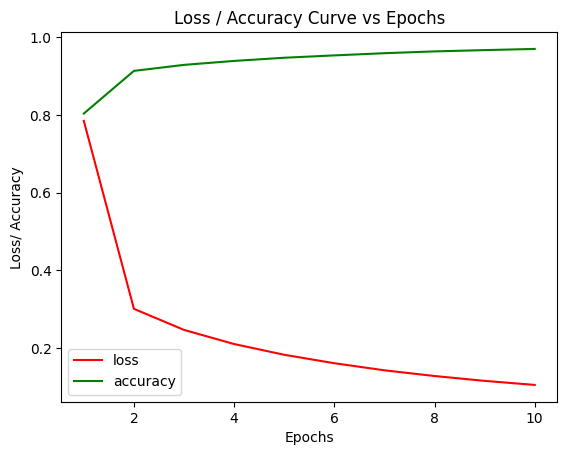

In [21]:
## plot training curves 
epochs = train_stats["epochs"]
loss = train_stats["loss"]
accuracy = train_stats["accuracy"]
plt.plot(epochs, loss, color = "red", label = "loss")
plt.plot(epochs, accuracy, color = "green", label = "accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss/ Accuracy")
plt.title("Loss / Accuracy Curve vs Epochs")

In [22]:
print("--------- INITIAL TEST ACCURACY OF AN UNTRAINED MODEL-------------")
baseline = Net()
test(baseline, test_loader, device)
print("---------- FINAL ACCURACY AFTER 10 EPOCHS TRAINING-----------------")
test(model, test_loader, device)


--------- INITIAL TEST ACCURACY OF AN UNTRAINED MODEL-------------
Accuracy: 8 %
---------- FINAL ACCURACY AFTER 10 EPOCHS TRAINING-----------------
Accuracy: 96 %
